In [2]:
# All Imports

import numpy as np
#import astra
import os
import imageio
import time
import matplotlib.pyplot as plt
import random
import tqdm
from tqdm import tqdm



import numpy as np
import numba
from numba import njit, prange
from numba import cuda
import copy
import sys
import time
import matplotlib.pyplot as plt
import pydicom
import glob
from skimage import filters
from skimage.filters import unsharp_mask, threshold_local, threshold_minimum
import matplotlib.pyplot as plt
import numpy as np
import glob

from skimage.measure import compare_ssim as ssim



import numba
from numba import njit, prange


import os
import skimage.io as io
import skimage.transform as trans
import numpy as np

from skimage.measure import label
from scipy.io import loadmat
from scipy.ndimage import zoom
#from scipy.misc import imresize
import pywt

import csv
import random
import time
%matplotlib inline  

from scipy import ndimage, misc

import pywt
#import hdf5storage

import scipy.io as sio
from skimage.filters import threshold_otsu

#import pylidc as pl


import pywt
import numpy as np
#import pydicom
import matplotlib.pyplot as plt
import SimpleITK as sitk
import skimage.io as io
#from sklearn.decomposition import PCA
import collections, numpy
import warnings
from scipy import ndimage, misc
warnings.filterwarnings('ignore')

#import pymrt as mrt
#import pymrt.geometry
import ipyvolume as ipv
import copy


import os
import glob
import uuid
import numpy as np
from ipdb import set_trace as bp



#from image_gen import ImageDataGenerator
#from load_data import loadDataMontgomery, loadDataJSRT
#from build_model import build_UNet2D_4L

import pandas as pd



import numpy
import warnings
import functools
import pickle
import time

In [147]:
# All CNN Models

import torch
from torch import nn
import torch.nn.functional as F
from torch.autograd import Variable

import matplotlib.pyplot as plt
import numpy as np
from torchsummary import summary

from skimage import measure

class MyUnet_half(nn.Module):
    def __init__(self):
        super().__init__()
        
        filter1 = 16
        filter2 = 32
        filter3 = 64
        filter4 = 128
        filter5 = 256
    
        self.dense_block = nn.Sequential(nn.Linear(1, 128),
                                         nn.LeakyReLU(),
                                         nn.Linear(128, 32),
                                         nn.LeakyReLU(),
                                         nn.Linear(32, 1),
                                         nn.LeakyReLU()
                                        )
        
        self.conv_block1 = nn.Sequential(
            nn.Conv2d(1, filter1, kernel_size=3, stride=1, padding=1),
            nn.LeakyReLU(0.2),
            nn.Conv2d(filter1, filter1, kernel_size=3, stride=1, padding=1),
            nn.LeakyReLU(0.2))
        self.pool1 = nn.MaxPool2d(2, stride=2)
        self.conv_block2 = nn.Sequential(
            nn.Conv2d(filter1, filter2, kernel_size=3, stride=1, padding=1),
            nn.LeakyReLU(0.2),
            nn.Conv2d(filter2, filter2, kernel_size=3, stride=1, padding=1),
            nn.LeakyReLU(0.2))
        self.pool2 = nn.MaxPool2d(2, stride=2)
        self.conv_block3 = nn.Sequential(
            nn.Conv2d(filter2, filter3, kernel_size=3, stride=1, padding=1),
            nn.LeakyReLU(0.2),
            nn.Conv2d(filter3, filter3, kernel_size=3, stride=1, padding=1),
            nn.LeakyReLU(0.2))
        self.pool3 = nn.MaxPool2d(2, stride=2)
        self.conv_block4 = nn.Sequential(
            nn.Conv2d(filter3, filter4, kernel_size=3, stride=1, padding=1),
            nn.LeakyReLU(0.2),
            nn.Conv2d(filter4, filter4, kernel_size=3, stride=1, padding=1),
            nn.LeakyReLU(0.2))
        self.pool4 = nn.MaxPool2d(2, stride=2)
        self.conv_block5 = nn.Sequential(
            nn.Conv2d(filter4, filter5, kernel_size=3, stride=1, padding=1),
            nn.LeakyReLU(0.2),
            nn.Conv2d(filter5, filter5, kernel_size=3, stride=1, padding=1),
            nn.LeakyReLU(0.2))
        self.pool5 = nn.MaxPool2d(2, stride=2)
        
        self.upsample1   = nn.Upsample(scale_factor=2, mode='bilinear')
        self.upsample2   = nn.Upsample(scale_factor=2, mode='bilinear')
        self.upsample3   = nn.Upsample(scale_factor=2, mode='bilinear')
        self.upsample4   = nn.Upsample(scale_factor=2, mode='bilinear')
        
        self.conv_block_merge1 = nn.Sequential(
            nn.Conv2d(filter5, filter4, kernel_size=3, stride=1, padding=1),
            nn.LeakyReLU(0.2))
        self.conv_block_merge2 = nn.Sequential(
            nn.Conv2d(filter4, filter3, kernel_size=3, stride=1, padding=1),
            nn.LeakyReLU(0.2))
        self.conv_block_merge3 = nn.Sequential(
            nn.Conv2d(filter3, filter2, kernel_size=3, stride=1, padding=1),
            nn.LeakyReLU(0.2))
        self.conv_block_merge4 = nn.Sequential(
            nn.Conv2d(filter2, filter1, kernel_size=3, stride=1, padding=1),
            nn.LeakyReLU(0.2))
        
        
        self.conv_block6 = nn.Sequential(
            nn.Conv2d(filter5, filter4, kernel_size=3, stride=1, padding=1),
            nn.LeakyReLU(0.2),
            nn.Conv2d(filter4, filter4, kernel_size=3, stride=1, padding=1),
            nn.LeakyReLU(0.2))
        self.conv_block7 = nn.Sequential(
            nn.Conv2d(filter4, filter3, kernel_size=3, stride=1, padding=1),
            nn.LeakyReLU(0.2),
            nn.Conv2d(filter3, filter3, kernel_size=3, stride=1, padding=1),
            nn.LeakyReLU(0.2))
        self.conv_block8 = nn.Sequential(
            nn.Conv2d(filter3, filter2, kernel_size=3, stride=1, padding=1),
            nn.LeakyReLU(0.2),
            nn.Conv2d(filter2, filter2, kernel_size=3, stride=1, padding=1),
            nn.LeakyReLU(0.2))
        self.conv_block9 = nn.Sequential(
            nn.Conv2d(filter2, filter1, kernel_size=3, stride=1, padding=1),
            nn.LeakyReLU(0.2),
            nn.Conv2d(filter1, filter1, kernel_size=3, stride=1, padding=1),
            nn.LeakyReLU(0.2))
        self.conv_block10 = nn.Sequential(
            nn.Conv2d(filter1, 1, kernel_size=3, stride=1, padding=1),
            nn.LeakyReLU(0.2))
        
        self.d1 = nn.Dropout(0.5)
        self.d2 = nn.Dropout(0.5)
        
    def forward(self, x, y):
        hash_val = self.dense_block(y)
        hash_val = hash_val.view(-1, 1, 1, 1)
        
        x1 = self.conv_block1(x)
        x1 = torch.mul(x1, hash_val)
        p1 = self.pool1(x1)
        
        x2 = self.conv_block2(p1)
        x2 = torch.mul(x2, hash_val)
        p2 = self.pool2(x2)
        
        x3 = self.conv_block3(p2)
        x3 = torch.mul(x3, hash_val)
        p3 = self.pool3(x3)
        #p3 = self.d1(p3)
        
        x4 = self.conv_block4(p3)
        x4 = torch.mul(x4, hash_val)
        p4 = self.pool4(x4)
        #p4 = self.d2(p4)
        
        x5 = self.conv_block5(p4)
        x5 = torch.mul(x5, hash_val)
        
        
        
        u1 = self.upsample1(x5)
        m6 = self.conv_block_merge1(u1)
        m6 = torch.cat((x4, m6), 1)
        x6 = self.conv_block6(m6)
        x6 = torch.mul(x6, hash_val)
        
        u2 = self.upsample2(x6)
        m7 = self.conv_block_merge2(u2)
        m7 = torch.cat((x3, m7), 1)
        x7 = self.conv_block7(m7)
        x7 = torch.mul(x7, hash_val)
        
        u3 = self.upsample3(x7)
        m8 = self.conv_block_merge3(u3)
        m8 = torch.cat((x2, m8), 1)
        x8 = self.conv_block8(m8)
        x8 = torch.mul(x8, hash_val)
        
        u4 = self.upsample4(x8)
        m9 = self.conv_block_merge4(u4)
        m9 = torch.cat((x1, m9), 1)
        x9 = self.conv_block9(m9)
        x9 = self.conv_block10(x9)
        
        out = torch.sub(x, x9)
        
        return out
    
print(np.arange(10))

[0 1 2 3 4 5 6 7 8 9]


In [ ]:
# [STAR] Code to get the patches for Walnut dataset

import numpy as np

train_list = np.arange(1, 29)#[1, 3, 6, 7, 11, 12, 13, 16, 17, 31, 33, 35, 37, 39, 41, 43, 50, 52, 55,  68, 69, 70, 71, 72, 73, 76]
val_list   = np.arange(30, 34)#[19, 21, 23, 25, 27, 29, 61, 62, 64, 65]
test_list  = np.arange(35, 43)#[10, 44, 45, 47, 54, 58, 59, 60, 66, 67, 74, 75]

all_list = np.concatenate([train_list, val_list, test_list])

for i in range(1, 43):
    if i not in all_list:
        continue
    
    #todo = [15, 16, 19, 20, 27, 29, 31, 35]
    #allfiles = glob.glob("/media/drilnvm/ubuntudata2/REAL-DBT-PROJECTIONS/RECONS/*_"+str(i)+".raw")
    allfiles = glob.glob("/media/pranjal/newdrive1/WalnutDataRecon/"+str(i)+"_*_huber.npy")
    allfiles.sort(key=lambda x: float(x.split('/')[-1].split('_')[1]), reverse=False)
    
    print('Files are ')
    for p in allfiles:
        print(p)
    
    mainfile = allfiles[0]#glob.glob("/media/drilnvm/ubuntudata2/REAL-DBT-PROJECTIONS/RECONS-LINEAR/*_"+str(i)+".raw")[0]
    
    all_vols   = np.zeros([len(allfiles), 251, 251, 251], dtype='float16')
    all_index  = []
    all_values = []
    all_values_z = []
    
    #temp = np.fromfile(mainfile, dtype='float32')
    #temp = np.reshape(temp, [40, 1200, 3000])
    #all_vols[0, :, :, :] = temp
    #all_index.append(i)
    #all_values.append(-0)
    
    counter = 0
    for f in allfiles:
        a     = np.load(f)
        all_vols[counter, :, :, :] = a
        value = float(f.split("/")[-1].split("_")[1])
        all_values.append(value)
        
        print(value, a.shape, f)
        counter = counter+1
    
    total_count   = 25
    all_locations = []
    total_values  = []
    
    x_array      = np.zeros([total_count*(len(all_vols)-1), 1, 256, 256], dtype='float16')
    y_array      = np.zeros([total_count*(len(all_vols)-1), 1, 256, 256], dtype='float16')
    v_array      = np.zeros([total_count*(len(all_vols)-1), 1], dtype='float32')
    
    slice_positions = []
    for pk in range(total_count):
        ix           = np.random.randint(50, 251-50)
        slice_positions.append(ix)
    
    # Get slices
    counter = 0
    for kp in range(total_count):
        ix = slice_positions[kp]
        for k in range(1, len(all_vols)):
            tempx                     = all_vols[0][:, ix, :]
            tempy                     = all_vols[k][:, ix, :]

            x_array[counter, 0, 3:-2, 3:-2] = tempx
            y_array[counter, 0, 3:-2, 3:-2] = tempy
            v_array[counter, 0]             = all_values[k]
            
            if all_values[k] == 0:
                print('some error')
            counter = counter+1
    
    np.save("/media/pranjal/newdrive1/WalnutDataReconPatches/v-array-"+str(i)+'.npy', v_array)
    np.save("/media/pranjal/newdrive1/WalnutDataReconPatches/x-array-"+str(i)+'.npy', x_array)
    np.save("/media/pranjal/newdrive1/WalnutDataReconPatches/y-array-"+str(i)+'.npy', y_array)
    

(125, 1, 256, 256) (125, 1, 256, 256) (125, 1)
[0.0143]


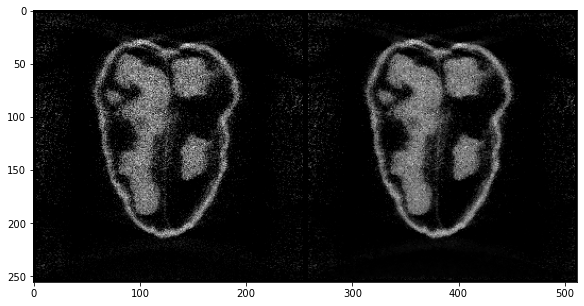

In [144]:
# For plotting the results

if 0:
    index = random.randint(1, 42)
    x = np.load('/media/pranjal/newdrive1/WalnutDataReconPatches/x-array-'+str(index)+'.npy')
    y = np.load('/media/pranjal/newdrive1/WalnutDataReconPatches/y-array-'+str(index)+'.npy')
    v = np.load('/media/pranjal/newdrive1/WalnutDataReconPatches/v-array-'+str(index)+'.npy')

print(x.shape, y.shape, v.shape)

plt.figure(figsize=(20, 5))
index = random.randint(0, x_array.shape[0]-1)
plt.imshow(np.concatenate([x_array[index, 0], y_array[index, 0]], axis=-1).astype('float32'), cmap='gray')
print(v_array[index])

#plt.imshow(np.concatenate([x[index*5, 0], y[index*5, 0], y[index*5+1, 0], y[index*5+2, 0], y[index*5+3, 0]], axis=-1).astype('float32'), cmap='gray')
#print(v[index*5:index*5+5].flatten())

In [139]:
# Reconstruction Code for a given Walnut Case

# select the ID of the sample you want to reconstruct
walnut_id = 1
# select also the orbit you want to reconstruct the data from:
# 1 higher source position, 2 middle source position, 3 lower source position
orbit_id = 2
# define a sub-sampling factor in angular direction
# (all reference reconstructions are computed with full angular resolution)
angluar_sub_sampling = 10
# select of voxels per mm in one direction (higher = larger res)
# (all reference reconstructions are computed with 10)
voxel_per_mm = 5

# we enter here some intrinsic details of the dataset needed for our reconstruction scripts
# set the variable "data_path" to the path where the dataset is stored on your own workstation
data_path = '/media/pranjal/newdrive1/Walnuts/'
# set the variable "recon_path" to the path where you would like to store the
# reconstructions you compute
recon_path = '/media/pranjal/newdrive1/Walnut_recons/'

t = time.time();
print('load data', flush=True)

# we add the info about walnut and orbit ID
data_path_full = os.path.join(data_path, 'Walnut{}'.format(walnut_id), 'Projections', 'tubeV{}'.format(orbit_id))
projs_name = 'scan_{:06}.tif'
dark_name = 'di000000.tif'
flat_name = ['io000000.tif', 'io000001.tif']
vecs_name = 'scan_geom_corrected.geom'
projs_rows = 972
projs_cols = 768

# load the numpy array describing the scan geometry from file
vecs = np.loadtxt(os.path.join(data_path_full, vecs_name))
# get the positions we need; there are in fact 1201, but the last and first one come from the same angle
vecs       = vecs[range(0,1200, angluar_sub_sampling)]
# projection file indices, we need to read in the projection in reverse order due to the portrait mode acquision 
projs_idx  = range(1199,-1, -angluar_sub_sampling)

n_pro = vecs.shape[0]

# create the numpy array which will receive projection data from tiff files
projs = np.zeros((n_pro, projs_rows, projs_cols), dtype=np.float32)

# transformation to apply to each image, we need to get the image from
# the way the scanner reads it out into to way described in the projection
# geometry
trafo = lambda image : np.transpose(np.flipud(image))

# load flat-field and dark-fields
# there are two flat-field images (taken before and after acquisition), we simply average them
dark = trafo(imageio.imread(os.path.join(data_path_full, dark_name)))
flat = np.zeros((2, projs_rows, projs_cols), dtype=np.float32)

for i, fn in enumerate(flat_name):
    flat[i] = trafo(imageio.imread(os.path.join(data_path_full, fn)))
flat =  np.mean(flat,axis=0)

# load projection data
for i in range(n_pro):
    projs[i] = trafo(imageio.imread(os.path.join(data_path_full, projs_name.format(projs_idx[i]))))

print(np.round_(time.time() - t, 3), 'sec elapsed')

### pre-process data ###########################################################

t = time.time();
print('pre-process data', flush=True)
# subtract the dark field, divide by the flat field, and take the negative log to linearize the data according to the Beer-Lambert law
projs -= dark
projs /= (flat - dark)
np.log(projs, out=projs)
np.negative(projs, out=projs)
# permute data to ASTRA convention
projs = np.transpose(projs, (1,0,2))
projs = np.ascontiguousarray(projs)
print(np.round_(time.time() - t, 3), 'sec elapsed')

# [STAR] Testing GroundTruthReconstruction.py
import NesterovGradient

orbits_to_recon = [1,2,3]

#### load and pre-process data #################################################

t = time.time();
print('load and pre-process data', flush=True)

# we add the info about walnut
data_path_full = os.path.join(data_path, 'Walnut{}'.format(walnut_id), 'Projections')

projs_name = 'scan_{:06}.tif'
dark_name  = 'di000000.tif'
flat_name  = ['io000000.tif', 'io000001.tif']
vecs_name  = 'scan_geom_corrected.geom'
projs_rows = 972
projs_cols = 768

# Create the numpy array which will receive projection data from tiff files
projs = np.zeros((projs_rows, 0, projs_cols), dtype=np.float32)

# And create the numpy array receiving the motor positions read from the geometry file
vecs           = np.zeros((0, 12), dtype=np.float32)
nb_projs_orbit = len(range(0,1200, angluar_sub_sampling))
# projection file indices, we need to read in the projection in reverse order due to the portrait mode acquision 
projs_idx      = range(1199,-1, -angluar_sub_sampling)

# transformation to apply to each image, we need to get the image from
# the way the scanner reads it out into to way described in the projection
# geometry
trafo = lambda image : np.transpose(np.flipud(image))

# Loop over the subset of orbits we want to load at the same time
for orbit_id in orbits_to_recon:
    orbit_data_path = os.path.join(data_path_full, 'tubeV{}'.format(orbit_id))


    # load the numpy array describing the scan geometry of the orbit from file
    vecs_orbit = np.loadtxt(os.path.join(orbit_data_path, vecs_name))
    
    # get the positions we need; there are in fact 1201, but the last and first one come from the same angle
    vecs = np.concatenate((vecs, vecs_orbit[range(0,1200, angluar_sub_sampling)]), axis=0)

    # load flat-field and dark-fields
    # there are two flat-field images (taken before and after acquisition), we simply average them
    dark = trafo(imageio.imread(os.path.join(orbit_data_path, dark_name)))
    flat = np.zeros((2, projs_rows, projs_cols), dtype=np.float32)
    for i, fn in enumerate(flat_name):
        flat[i] = trafo(imageio.imread(os.path.join(orbit_data_path, fn)))
    flat =  np.mean(flat,axis=0)

    # load projection data directly on the big projection array
    projs_orbit = np.zeros((nb_projs_orbit, projs_rows, projs_cols), dtype=np.float32)
    for i in range(nb_projs_orbit):
        projs_orbit[i] = trafo(imageio.imread(os.path.join(orbit_data_path, projs_name.format(projs_idx[i]))))

    # subtract the dark field, devide by the flat field, and take the negative log to linearize the data according to the Beer-Lambert law
    projs_orbit -= dark
    projs_orbit /= (flat - dark)
    
    projs_orbit_temp = np.random.poisson(projs_orbit)#projs_orbit + noise
    projs_orbit      = projs_orbit + projs_orbit_temp/10
    projs_orbit[projs_orbit == 0] = 1
    projs_orbit[projs_orbit > 1]  = 1
    projs_orbit = projs_orbit.astype('float32')
    
    # take negative log
    np.log(projs_orbit, out=projs_orbit)
    np.negative(projs_orbit, out=projs_orbit)
    # permute data to ASTRA convention
    projs_orbit = np.transpose(projs_orbit, (1,0,2))

    # attach to projs
    projs = np.concatenate((projs, projs_orbit), axis=1)
    del projs_orbit

    
from skimage.util import random_noise

# for k in range(360):
#     p     = projs[:, k, :]
#     noise = random_noise(p, mode="poisson")
#     #noise = np.random.poisson(p)
#     #noise = np.random.normal(0, 0.1, p.shape)
#     p     = p + noise
#     projs[:, k, :] = p
projs = np.ascontiguousarray(projs)

print(np.round_(time.time() - t, 3), 'sec elapsed')



# ### compute iterative reconstruction ###########################################

# t = time.time();
# print('compute reconstruction:', flush=True)

# # size of the reconstruction volume in voxels
# vol_sz  = 3*(50 * voxel_per_mm + 1,)
# # size of a cubic voxel in mm
# vox_sz  = 1/voxel_per_mm
# # numpy array holding the reconstruction volume
# vol_rec = np.zeros(vol_sz, dtype=np.float32)

# # we need to specify the details of the reconstruction space to ASTRA
# # this is done by a "volume geometry" type of structure, in the form of a Python dictionary
# # by default, ASTRA assumes a voxel size of 1, we need to scale the reconstruction space here by the actual voxel size
# vol_geom = astra.create_vol_geom(vol_sz)
# vol_geom['option']['WindowMinX'] = vol_geom['option']['WindowMinX'] * vox_sz
# vol_geom['option']['WindowMaxX'] = vol_geom['option']['WindowMaxX'] * vox_sz
# vol_geom['option']['WindowMinY'] = vol_geom['option']['WindowMinY'] * vox_sz
# vol_geom['option']['WindowMaxY'] = vol_geom['option']['WindowMaxY'] * vox_sz
# vol_geom['option']['WindowMinZ'] = vol_geom['option']['WindowMinZ'] * vox_sz
# vol_geom['option']['WindowMaxZ'] = vol_geom['option']['WindowMaxZ'] * vox_sz

# # we need to specify the details of the projection space to ASTRA
# # this is done by a "projection geometry" type of structure, in the form of a Python dictionary
# proj_geom = astra.create_proj_geom('cone_vec', projs_rows, projs_cols, vecs)

# # register both volume and projection geometries and arrays to ASTRA
# vol_id       = astra.data3d.link('-vol', vol_geom, vol_rec)
# proj_id      = astra.data3d.link('-sino', proj_geom, projs)
# projector_id = astra.create_projector('cuda3d', proj_geom, vol_geom)

# ## finally, create an ASTRA configuration.
# ## this configuration dictionary setups an algorithm, a projection and a volume
# ## geometry and returns a ASTRA algorithm, which can be run on its own
# astra.plugin.register(NesterovGradient.AcceleratedGradientPlugin)
# cfg_agd                         = astra.astra_dict('AGD-PLUGIN')
# cfg_agd['ProjectionDataId']     = proj_id
# cfg_agd['ReconstructionDataId'] = vol_id
# cfg_agd['ProjectorId']          = projector_id
# cfg_agd['option']               = {}
# cfg_agd['option']['MinConstraint'] = 0
# alg_id = astra.algorithm.create(cfg_agd)

# # Run Nesterov Accelerated Gradient Descent algorithm with 'nb_iter' iterations
# nb_iter = 50
# astra.algorithm.run(alg_id, nb_iter)

# # release memory allocated by ASTRA structures
# astra.algorithm.delete(alg_id)
# astra.data3d.delete(proj_id)
# astra.data3d.delete(vol_id)

# print(np.round_(time.time() - t, 3), 'sec elapsed')



# ### plot and save reconstruction ##############################################

# t = time.time();
# print('save results', flush=True)

# # low level plotting
# f, ax = plt.subplots(1, 3, sharex=False, sharey=False)
# ax[0].imshow(vol_rec[vol_sz[0]//2,:,:])
# ax[1].imshow(vol_rec[:,vol_sz[1]//2,:])
# ax[2].imshow(vol_rec[:,:,vol_sz[2]//2])
# f.tight_layout()

# # construct full path for storing the results
# recon_path_full = os.path.join(recon_path, 'Walnut{}'.format(walnut_id))

# # create the directory in case it doesn't exist yet
# if not os.path.exists(recon_path_full):
#     os.makedirs(recon_path_full)

# # Save every slice in  the volume as a separate tiff file
# orbit_str = 'pos'
# for orbit_id in orbits_to_recon:
#     orbit_str = orbit_str + '{}'.format(orbit_id)
    
# for i in range(vol_sz[0]):
#     slice_path = os.path.join(recon_path_full, 'nnls_' + orbit_str + '_iter{}_ass{}_vmm{}_{:06}.tiff'.format(nb_iter,
#                                   angluar_sub_sampling, voxel_per_mm, i))
#     imageio.imwrite(slice_path, vol_rec[i,...])

# print(np.round_(time.time() - t, 3), 'sec elapsed')


load data
0.23 sec elapsed
pre-process data
2.734 sec elapsed
load and pre-process data
21.773 sec elapsed


In [ ]:
# [STAR] For reading the training data

import glob
import numpy as np

train_list = np.arange(1, 29)#[1, 3, 6, 7, 11, 12, 13, 16, 17, 31, 33, 35, 37, 39, 41, 43, 50, 52, 55,  68, 69, 70, 71, 72, 73, 76]
val_list   = np.arange(30, 34)#[19, 21, 23, 25, 27, 29, 61, 62, 64, 65]
test_list  = np.arange(35, 43)

train_size = len(train_list)*125
x_array = np.zeros([train_size, 1, 256, 256], dtype='float16')
v_array = np.zeros([train_size, 1], dtype='float32')
y_array = np.zeros([train_size, 1, 256, 256], dtype='float16')

val_size = len(val_list)*125
x_val_array = np.zeros([val_size, 1, 256, 256], dtype='float16')
v_val_array = np.zeros([val_size, 1], dtype='float32')
y_val_array = np.zeros([val_size, 1, 256, 256], dtype='float16')

patches_path = '/media/pranjal/newdrive1/WalnutDataReconPatches/'
count = 0
for t in train_list:
    x = np.load(patches_path+'x-array-'+str(t)+'.npy')
    y = np.load(patches_path+'y-array-'+str(t)+'.npy')
    v = np.load(patches_path+'v-array-'+str(t)+'.npy')    
    
    y_array[count: count+x.shape[0], :, :, :] = y
    x_array[count: count+x.shape[0], :, :, :] = x
    v_array[count: count+x.shape[0], :]       = v
    count = count+x.shape[0]
    #print(t, v.shape)

x_array = x_array[:count]
y_array = y_array[:count]
v_array = v_array[:count]
print(x_array.shape, y_array.shape, v_array.shape, count)

count = 0
for t in val_list:
    x = np.load(patches_path+'x-array-'+str(t)+'.npy')
    y = np.load(patches_path+'y-array-'+str(t)+'.npy')
    v = np.load(patches_path+'v-array-'+str(t)+'.npy')    
    
    y_val_array[count: count+x.shape[0], :, :, :] = y
    x_val_array[count: count+x.shape[0], :, :, :] = x
    v_val_array[count: count+x.shape[0], :]       = v
    count = count+x.shape[0]

x_val_array = x_val_array[:count]
y_val_array = y_val_array[:count]
v_val_array = v_val_array[:count]
print(x_val_array.shape, y_val_array.shape, v_val_array.shape, count)


In [195]:
# [STAR] For training the Pytorch Model for Imitating the result with volume Slice Huber

import torch
import torch.nn.functional as F
from torch.autograd import Variable
import numpy as np
from math import exp

def gaussian(window_size, sigma):
    gauss = torch.Tensor([exp(-(x - window_size//2)**2/float(2*sigma**2)) for x in range(window_size)])
    return gauss/gauss.sum()

def create_window(window_size, channel):
    _1D_window = gaussian(window_size, 1.5).unsqueeze(1)
    _2D_window = _1D_window.mm(_1D_window.t()).float().unsqueeze(0).unsqueeze(0)
    window = Variable(_2D_window.expand(channel, 1, window_size, window_size).contiguous())
    return window

def _ssim(img1, img2, window, window_size, channel, size_average = True):
    mu1 = F.conv2d(img1, window, padding = window_size//2, groups = channel)
    mu2 = F.conv2d(img2, window, padding = window_size//2, groups = channel)

    mu1_sq = mu1.pow(2)
    mu2_sq = mu2.pow(2)
    mu1_mu2 = mu1*mu2

    sigma1_sq = F.conv2d(img1*img1, window, padding = window_size//2, groups = channel) - mu1_sq
    sigma2_sq = F.conv2d(img2*img2, window, padding = window_size//2, groups = channel) - mu2_sq
    sigma12 = F.conv2d(img1*img2, window, padding = window_size//2, groups = channel) - mu1_mu2

    C1 = 0.01**2
    C2 = 0.03**2

    ssim_map = ((2*mu1_mu2 + C1)*(2*sigma12 + C2))/((mu1_sq + mu2_sq + C1)*(sigma1_sq + sigma2_sq + C2))

    if size_average:
        return ssim_map.mean()
    else:
        return ssim_map.mean(1).mean(1).mean(1)

class SSIM(torch.nn.Module):
    def __init__(self, window_size = 11, size_average = True):
        super(SSIM, self).__init__()
        self.window_size = window_size
        self.size_average = size_average
        self.channel = 1
        self.window = create_window(window_size, self.channel)

    def forward(self, img1, img2):
        (_, channel, _, _) = img1.size()

        if channel == self.channel and self.window.data.type() == img1.data.type():
            window = self.window
        else:
            window = create_window(self.window_size, channel)
            
            if img1.is_cuda:
                window = window.cuda(img1.get_device())
            window = window.type_as(img1)
            
            self.window = window
            self.channel = channel


        return _ssim(img1, img2, window, self.window_size, channel, self.size_average)

def ssim(img1, img2, window_size = 11, size_average = True):
    (_, channel, _, _) = img1.size()
    window = create_window(window_size, channel)
    
    if img1.is_cuda:
        window = window.cuda(img1.get_device())
    window = window.type_as(img1)
    
    return _ssim(img1, img2, window, window_size, channel, size_average)

import torch.optim as optim
from skimage import measure
#import pytorch_msssim


def get_ssim(pred, ground):
    ssim_array = []
    
    for i in range(pred.shape[0]):
        t1 = np.min(ground[i].flatten())
        t2 = np.max(ground[i].flatten())
        reference_image = (ground[i, 0]-t1)*255/(t2-t1)
        
        t1 = np.min(pred[i, 0, :, :].flatten())
        t2 = np.max(pred[i, 0, :, :].flatten())
        distorted_image = (pred[i, 0]-t1)*255/(t2-t1)
        
        ssim_temp = measure.compare_ssim(distorted_image, reference_image, data_range=255)
        ssim_array.append(ssim_temp)
    
    return ssim_array

def get_ssim_distribution(ssim_input_array, value_array):
    #print(ssim_input_array)
    #value_array.sort()
    #print(value_array)
    
    ssim_array = {}
    ssim_array[0.01] = []
    ssim_array[0.02] = []
    ssim_array[0.03] = []
    ssim_array[0.04] = []
    ssim_array[0.05] = []
    
    for i in range(len(value_array)):
        value     = value_array[i][0]
        ssim_temp = ssim_input_array[i]
        #if value < 0.01:
        #    print('test it pranjal ', value, ssim_temp)
        if value < 0.01:
            ssim_array[0.01].append(ssim_temp)
            #mae_array[0.1].append(mae_temp)
        elif value < 0.02:
            ssim_array[0.02].append(ssim_temp)
            #mae_array[0.2].append(mae_temp)    
        elif  value < 0.03:
            ssim_array[0.03].append(ssim_temp)
            #mae_array[0.3].append(mae_temp)    
        elif  value < 0.04:
            ssim_array[0.04].append(ssim_temp)
            #mae_array[0.4].append(mae_temp)    
        elif value < 0.05:
            ssim_array[0.05].append(ssim_temp)
            #mae_array[0.5].append(mae_temp)  
    
    mean_ssim_array = []
    for k in ssim_array.keys():
        mean_ssim_array.append(np.mean(ssim_array[k]))
    mean_ssim_array = [str(round(x, 5)) for x in mean_ssim_array]
    
    return ", ".join(mean_ssim_array)

model = MyUnet_half()
model.cuda()


device    = torch.device("cuda:0")
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.L1Loss()
mse_criterion  = nn.MSELoss()

def my_loss(output, target):
    loss = torch.mean(torch.abs((output - target)))
    return loss

my_loss1 = SSIM()
#MSSSIM()

prev_min   = 1000
batch_size = 8

#model.train()
for epoch in range(1000):
    model.train()
    loss_array = []
    ssim_array = []
    value_array  = []
    
    idx     = np.random.permutation(len(x_array))
    x_array = x_array[idx]
    y_array = y_array[idx]
    v_array = v_array[idx]
    
    for i in range(len(x_array)//batch_size):
        x = x_array[i*batch_size:(i+1)*batch_size, :, :, :]
        y = y_array[i*batch_size:(i+1)*batch_size, :, :, :]
        v = v_array[i*batch_size:(i+1)*batch_size, :]
        v1 = v
        #print(x.shape, y.shape, z.shape)
        
        x = torch.tensor(x, device=device).float()
        y = torch.tensor(y, device=device).float()
        v = torch.tensor(v, device=device).float()
        v2 = v
        optimizer.zero_grad()
        output = model(x, v)
        #print(output.shape)
        #break
        #print(x.data.shape, output.data.shape)
        
        loss1  = -my_loss1(output, y)
        loss2  =  my_loss(output, y)
        
        loss   = loss2#+loss2
        
        output = output.data.cpu().numpy()
        y      = y.data.cpu().numpy()
        v      = v.data.cpu().numpy()
        v3 = v
        #print(output.shape, y.shape)
        ssim_values = get_ssim(output, y)
        
        #print(v1.flatten())
        #print(v2.flatten())
        #print(v3.flatten())
        
        #if i % 100 == 0:
        #    print(i, loss.data.shape, loss.item())
        for vt in ssim_values:
            ssim_array.append(vt)
        for ik, vt in enumerate(v):
            #if vt[0] < 0.01:
            #    print(vt[0], 'a', v1[ik], v2[ik], v3[ik])
            value_array.append(vt)
        
        loss_array.append(loss.item())
        
        #print(loss.item())
        #optim.zero_grad()
        
        loss.backward()
        optimizer.step()
    
    #print(value_array)
    ssim_string = get_ssim_distribution(ssim_array, value_array)
    
    print('Loss ', np.mean(loss_array), ' SSIM ', ssim_string)
    
    
    model.eval()
    loss_array = []
    ssim_array = []
    value_array  = []
    
    for i in range(len(x_val_array)//batch_size):
        x = x_val_array[i*batch_size:(i+1)*batch_size, :, :, :]
        y = y_val_array[i*batch_size:(i+1)*batch_size, :, :, :]
        v = v_val_array[i*batch_size:(i+1)*batch_size, :]

        x = torch.tensor(x, device=device).float()
        y = torch.tensor(y, device=device).float()
        v = torch.tensor(v, device=device).float()

        output = model(x, v)

        loss1 = -my_loss1(output, y)
        loss2 = my_loss(output, y)
        loss  = loss2#+loss2
        
        output = output.data.cpu().numpy()
        y      = y.data.cpu().numpy()
        v      = v.data.cpu().numpy()
        
        ssim_values = get_ssim(output, y)
        
        for vt in ssim_values:
            ssim_array.append(vt)
        for vt in v:
            value_array.append(vt)
        
        loss_array.append(loss.item())
    
    
    ssim_string = get_ssim_distribution(ssim_array, value_array)
        
    val_loss = np.mean(loss_array)
    print("Val loss ", val_loss, ' SSIM ', ssim_string)
    
    if val_loss < prev_min:
        prev_min = val_loss
        print('saving the model ', prev_min)
        torch.save(model.state_dict(), "unethalf-uber-walnut.pt")

Loss  0.0017473919314175655  SSIM  0.30607, 0.28928, 0.27175, 0.25285, 0.22821
Val loss  0.0010650450562787873  SSIM  0.33918, 0.33212, 0.30681, 0.28218, 0.28515
saving the model  0.0010650450562787873
Loss  0.0010978263745959934  SSIM  0.34823, 0.32889, 0.30317, 0.28062, 0.25097
Val loss  0.0008351767741729536  SSIM  0.32818, 0.3257, 0.30669, 0.28534, 0.29255
saving the model  0.0008351767741729536
Loss  0.0007754883906360896  SSIM  0.31486, 0.30212, 0.28814, 0.27565, 0.25564
Val loss  0.0005598907868730866  SSIM  0.31726, 0.30946, 0.29316, 0.27876, 0.29762
saving the model  0.0005598907868730866
Loss  0.001641161633067451  SSIM  0.3376, 0.31985, 0.296, 0.27863, 0.25495
Val loss  0.0010284508734325608  SSIM  0.36755, 0.35698, 0.32656, 0.29888, 0.29994
Loss  0.0012258085544802643  SSIM  0.40218, 0.37719, 0.34072, 0.31156, 0.27677
Val loss  0.0010395882164894214  SSIM  0.39847, 0.38395, 0.34806, 0.31723, 0.31597
Loss  0.001166461873182615  SSIM  0.41045, 0.38309, 0.34621, 0.31635, 0.281

Val loss  0.0003149574073294418  SSIM  0.84531, 0.75902, 0.64152, 0.56983, 0.52553
Loss  0.00031233884859293665  SSIM  0.8191, 0.72938, 0.62066, 0.55267, 0.50783
Val loss  0.00028050839436248007  SSIM  0.82156, 0.75236, 0.67161, 0.62375, 0.59794
Loss  0.0003105045950685602  SSIM  0.82334, 0.73199, 0.6155, 0.55414, 0.50763
Val loss  0.0002851010586093781  SSIM  0.83802, 0.73332, 0.62507, 0.58333, 0.55326
Loss  0.00030727909039920584  SSIM  0.8327, 0.74092, 0.61729, 0.55958, 0.5116
Val loss  0.0002843410080869592  SSIM  0.84972, 0.76191, 0.64097, 0.57918, 0.54768
Loss  0.0003074493103546374  SSIM  0.83531, 0.73876, 0.62493, 0.56046, 0.51749
Val loss  0.0002743198675753158  SSIM  0.81992, 0.70986, 0.5964, 0.54601, 0.53179
saving the model  0.0002743198675753158
Loss  0.0003015029323322179  SSIM  0.84097, 0.74666, 0.62731, 0.5629, 0.51885
Val loss  0.00026982205365070955  SSIM  0.88468, 0.80147, 0.66538, 0.60832, 0.57551
saving the model  0.00026982205365070955
Loss  0.0003033168500580091 

Loss  0.00027635976075208725  SSIM  0.90191, 0.8271, 0.7221, 0.67168, 0.6268
Val loss  0.00027043446490067927  SSIM  0.97126, 0.88505, 0.78735, 0.73828, 0.69183
Loss  0.00027468566359492867  SSIM  0.90685, 0.82258, 0.72344, 0.67531, 0.62824
Val loss  0.0002642705263907931  SSIM  0.9521, 0.80189, 0.68322, 0.62567, 0.58603
Loss  0.0002747421345484662  SSIM  0.91041, 0.82376, 0.72767, 0.67649, 0.62964
Val loss  0.00024310775458410893  SSIM  0.86799, 0.76227, 0.67822, 0.63781, 0.61696
Loss  0.0002759085049220223  SSIM  0.9102, 0.82676, 0.72651, 0.67619, 0.64252
Val loss  0.0002572168981010515  SSIM  0.88841, 0.73794, 0.65152, 0.61737, 0.60692
Loss  0.0002740447657302983  SSIM  0.91681, 0.83034, 0.72978, 0.68128, 0.63328
Val loss  0.0002681541265056078  SSIM  0.95688, 0.83915, 0.73384, 0.68468, 0.64968
Loss  0.0002720431414081968  SSIM  0.91513, 0.82811, 0.73104, 0.6819, 0.63766
Val loss  0.00025513215598860575  SSIM  0.89212, 0.78496, 0.70165, 0.67259, 0.66051
Loss  0.00027389796567417696 

Val loss  0.00026992490987346  SSIM  0.93243, 0.86658, 0.77582, 0.73347, 0.71242
Loss  0.0002458361259791442  SSIM  0.95985, 0.92105, 0.84823, 0.80019, 0.75574
Val loss  0.00025322469704288747  SSIM  0.97188, 0.90008, 0.79306, 0.73962, 0.73042
Loss  0.0002472917166066974  SSIM  0.9577, 0.91676, 0.84164, 0.79822, 0.75722
Val loss  0.00024643788680306545  SSIM  0.971, 0.90798, 0.82373, 0.77606, 0.74488
Loss  0.00024579246543870363  SSIM  0.95843, 0.91943, 0.84869, 0.79823, 0.76211
Val loss  0.0002495473306607305  SSIM  0.9724, 0.92657, 0.85367, 0.81248, 0.79329
Loss  0.0002477495161715084  SSIM  0.9585, 0.91356, 0.84234, 0.79944, 0.75554
Val loss  0.0002519002068325907  SSIM  0.9554, 0.9038, 0.83518, 0.79984, 0.76453
Loss  0.0002477598611749859  SSIM  0.95742, 0.91655, 0.84233, 0.8007, 0.76262
Val loss  0.0002716043762179212  SSIM  0.95192, 0.90705, 0.85175, 0.80744, 0.76874
Loss  0.00024334122130404814  SSIM  0.95901, 0.92045, 0.85183, 0.80601, 0.76397
Val loss  0.00024223205212864184  

Loss  0.00023247351542891493  SSIM  0.97528, 0.93692, 0.87512, 0.83336, 0.7927
Val loss  0.0002776681837032459  SSIM  0.99779, 0.98993, 0.96589, 0.94496, 0.92352
Loss  0.000228369619284514  SSIM  0.97546, 0.93661, 0.87735, 0.84383, 0.8033
Val loss  0.00026585513466758834  SSIM  0.99322, 0.99038, 0.92261, 0.87656, 0.80969
Loss  0.0002297156603783176  SSIM  0.97456, 0.94249, 0.8776, 0.83798, 0.79489
Val loss  0.0002452032603023033  SSIM  0.97172, 0.92432, 0.85239, 0.8086, 0.77512
Loss  0.00022953179760000234  SSIM  0.97583, 0.93792, 0.87804, 0.83854, 0.80317
Val loss  0.0002502234194487814  SSIM  0.98814, 0.94716, 0.8893, 0.84767, 0.82983
Loss  0.0002307359978230992  SSIM  0.97645, 0.9391, 0.88104, 0.84043, 0.80382
Val loss  0.0002707234429357003  SSIM  0.9883, 0.93691, 0.86246, 0.82028, 0.78689
Loss  0.00022775675870224937  SSIM  0.97689, 0.93869, 0.87973, 0.84514, 0.80213
Val loss  0.00025396759977616793  SSIM  0.98615, 0.92814, 0.86247, 0.82612, 0.78938
Loss  0.0002256915616225623  SS

Loss  0.00021874812846530705  SSIM  0.97847, 0.94921, 0.89408, 0.86745, 0.84272
Val loss  0.00024975843728996904  SSIM  0.96259, 0.91244, 0.82439, 0.77747, 0.756
Loss  0.00021732903412497102  SSIM  0.97937, 0.94968, 0.89526, 0.86962, 0.84636
Val loss  0.0002619213086173629  SSIM  0.96949, 0.90809, 0.84247, 0.81136, 0.79898
Loss  0.0002202921034862107  SSIM  0.98169, 0.95054, 0.89609, 0.86789, 0.83421
Val loss  0.00024331206629041492  SSIM  0.98049, 0.95388, 0.91743, 0.8883, 0.86726
Loss  0.0002172032284086585  SSIM  0.9814, 0.95106, 0.89619, 0.86715, 0.84048
Val loss  0.00024519007169029433  SSIM  0.98409, 0.94773, 0.8874, 0.85128, 0.83732
Loss  0.00021999343716156398  SSIM  0.98032, 0.95468, 0.89829, 0.8676, 0.84126
Val loss  0.00026065898348479684  SSIM  0.98446, 0.92771, 0.76049, 0.70369, 0.66563
Loss  0.00021635207803509507  SSIM  0.9814, 0.95218, 0.89346, 0.86283, 0.8408
Val loss  0.00026361558763798507  SSIM  0.98871, 0.96373, 0.90515, 0.87867, 0.86933
Loss  0.0002178462723119577

Loss  0.0002127042217802445  SSIM  0.98366, 0.95284, 0.89476, 0.86746, 0.84092
Val loss  0.0002589317366308082  SSIM  0.99456, 0.95216, 0.88025, 0.83476, 0.80139
Loss  0.0002116227316217334  SSIM  0.98388, 0.95471, 0.89959, 0.86609, 0.84923
Val loss  0.00025490508391334105  SSIM  0.99101, 0.96136, 0.90704, 0.87203, 0.85394
Loss  0.00020922021031694074  SSIM  0.98363, 0.95391, 0.90345, 0.86982, 0.84983
Val loss  0.00026178267838869  SSIM  0.99765, 0.97325, 0.90677, 0.88954, 0.88048
Loss  0.00021072478728472954  SSIM  0.98357, 0.95284, 0.90411, 0.86998, 0.84071
Val loss  0.0002776296457722633  SSIM  0.99509, 0.96697, 0.90109, 0.86223, 0.84906
Loss  0.00020792011548722086  SSIM  0.98442, 0.95291, 0.90426, 0.87665, 0.84953
Val loss  0.00026418904716622146  SSIM  0.99724, 0.97983, 0.92068, 0.87347, 0.80989
Loss  0.00021084019173462962  SSIM  0.9837, 0.95328, 0.9045, 0.87221, 0.84436
Val loss  0.00027156377543560077  SSIM  0.99802, 0.98817, 0.94219, 0.93201, 0.91317
Loss  0.00021283054933695

Val loss  0.00027207591342777313  SSIM  0.97937, 0.93727, 0.84691, 0.80359, 0.78531
Loss  0.0002080102716433099  SSIM  0.98401, 0.9553, 0.90687, 0.8743, 0.84669
Val loss  0.0002612818624906903  SSIM  0.99772, 0.97719, 0.92088, 0.89148, 0.87306
Loss  0.00020569898484517233  SSIM  0.98438, 0.95535, 0.90344, 0.87503, 0.84741
Val loss  0.000288604476560478  SSIM  0.97769, 0.93215, 0.85813, 0.82216, 0.79195
Loss  0.00020664043823516743  SSIM  0.98323, 0.95677, 0.90453, 0.87686, 0.84831
Val loss  0.0002589590149000287  SSIM  0.99195, 0.95089, 0.88755, 0.85234, 0.82721
Loss  0.0002047715767860479  SSIM  0.98445, 0.95565, 0.90686, 0.87584, 0.85068
Val loss  0.00026373720550421445  SSIM  0.98231, 0.93506, 0.8314, 0.78515, 0.76064
Loss  0.000205750290807637  SSIM  0.98476, 0.95346, 0.90348, 0.87537, 0.84589
Val loss  0.00026330294372934487  SSIM  0.9824, 0.92494, 0.84403, 0.80397, 0.77249
Loss  0.0002056117010493827  SSIM  0.98459, 0.95634, 0.90591, 0.87774, 0.85423
Val loss  0.00028404121657067

Val loss  0.0002551539504155141  SSIM  0.98929, 0.94021, 0.85671, 0.823, 0.80773
Loss  0.00020457088634396434  SSIM  0.9847, 0.9562, 0.90884, 0.87783, 0.85506
Val loss  0.00025160224111224976  SSIM  0.98465, 0.95068, 0.90512, 0.87827, 0.85663
Loss  0.00020196820760289558  SSIM  0.9848, 0.953, 0.90753, 0.88406, 0.85397
Val loss  0.0002558205301137341  SSIM  0.97554, 0.92194, 0.85225, 0.81133, 0.78571
Loss  0.00019984198394843082  SSIM  0.98411, 0.95494, 0.91182, 0.88333, 0.85647
Val loss  0.0002620740182934359  SSIM  0.97378, 0.9173, 0.84791, 0.80377, 0.78402
Loss  0.00020185251075673574  SSIM  0.98423, 0.95646, 0.91077, 0.88125, 0.85527
Val loss  0.000255299256335298  SSIM  0.98713, 0.94378, 0.85543, 0.81704, 0.7961
Loss  0.00020313568930353535  SSIM  0.98503, 0.95648, 0.90366, 0.88061, 0.85759
Val loss  0.0002678296180918903  SSIM  0.99832, 0.9829, 0.88662, 0.84204, 0.79645
Loss  0.00020224690786160504  SSIM  0.98521, 0.95703, 0.90813, 0.87806, 0.85597
Val loss  0.000250953015629127  

Val loss  0.00027156925188460116  SSIM  0.99844, 0.98545, 0.95198, 0.93075, 0.89749
Loss  0.00019826112540512805  SSIM  0.98385, 0.95896, 0.9106, 0.88449, 0.85338
Val loss  0.00025485346592294295  SSIM  0.98794, 0.95255, 0.88388, 0.86252, 0.86239
Loss  0.0001971407110863451  SSIM  0.98376, 0.95743, 0.914, 0.88876, 0.86245
Val loss  0.00026267040718061426  SSIM  0.96814, 0.91506, 0.84574, 0.80683, 0.78616
Loss  0.00019575916593470545  SSIM  0.98456, 0.95673, 0.91316, 0.88379, 0.86232
Val loss  0.00025836803486585736  SSIM  0.98145, 0.93627, 0.87698, 0.84969, 0.83011
Loss  0.0001964821547408232  SSIM  0.98387, 0.95509, 0.91275, 0.88258, 0.85948
Val loss  0.00031159609329000477  SSIM  0.99725, 0.99003, 0.97348, 0.96105, 0.93923
Loss  0.00019861023393212839  SSIM  0.98482, 0.95664, 0.90936, 0.87925, 0.85072
Val loss  0.00027089568057788474  SSIM  0.98005, 0.94464, 0.89195, 0.86627, 0.84581
Loss  0.0001990005327281349  SSIM  0.98395, 0.95965, 0.91303, 0.88576, 0.86031
Val loss  0.0002618751

Loss  0.0001953003978460527  SSIM  0.98457, 0.95718, 0.91252, 0.88843, 0.85828
Val loss  0.00026801752603440094  SSIM  0.99775, 0.97875, 0.92905, 0.89416, 0.86859
Loss  0.00019819450204304638  SSIM  0.98352, 0.95367, 0.90975, 0.88045, 0.85602
Val loss  0.0002540311455255329  SSIM  0.97747, 0.93881, 0.89608, 0.86987, 0.85226
Loss  0.00019335244801179784  SSIM  0.98446, 0.95668, 0.91395, 0.88689, 0.86657
Val loss  0.0002603310408190854  SSIM  0.99464, 0.96872, 0.91961, 0.89324, 0.87651
Loss  0.00020067812569792413  SSIM  0.98254, 0.95442, 0.90435, 0.87603, 0.85384
Val loss  0.0002595237280230879  SSIM  0.99339, 0.96406, 0.91271, 0.88683, 0.84766
Loss  0.00019656396574235612  SSIM  0.9853, 0.95958, 0.91228, 0.88555, 0.85972
Val loss  0.0002566033528578813  SSIM  0.98457, 0.94972, 0.90217, 0.87908, 0.85899
Loss  0.00019832100107094214  SSIM  0.98363, 0.95367, 0.91188, 0.88153, 0.86017
Val loss  0.0002636791757522001  SSIM  0.98442, 0.94926, 0.89605, 0.87459, 0.85855
Loss  0.000194231341092

Loss  0.00019220031673758729  SSIM  0.98392, 0.95604, 0.91172, 0.88871, 0.86956
Val loss  0.0002742511264401518  SSIM  0.99862, 0.98548, 0.94266, 0.92669, 0.88993
Loss  0.00019409967445774317  SSIM  0.98549, 0.9588, 0.91419, 0.8878, 0.86362
Val loss  0.0002558586842966296  SSIM  0.97862, 0.929, 0.85571, 0.81579, 0.78866
Loss  0.00019295811845262723  SSIM  0.98329, 0.95608, 0.91071, 0.88707, 0.86478
Val loss  0.0002563278275990723  SSIM  0.98297, 0.95267, 0.90758, 0.88056, 0.85604
Loss  0.00019734987082691596  SSIM  0.98438, 0.95794, 0.91133, 0.88868, 0.8624
Val loss  0.00026956506448069345  SSIM  0.99799, 0.97775, 0.94042, 0.91561, 0.88134
Loss  0.00019180670753175024  SSIM  0.98353, 0.95633, 0.91114, 0.88727, 0.86473
Val loss  0.00025723674620929806  SSIM  0.98456, 0.94974, 0.89073, 0.85249, 0.81321
Loss  0.00019362328750360865  SSIM  0.98346, 0.95943, 0.91566, 0.88778, 0.86076
Val loss  0.0002691298296051701  SSIM  0.99151, 0.95793, 0.87701, 0.84541, 0.818
Loss  0.0001940287231917767

Val loss  0.0002629850566717646  SSIM  0.96044, 0.90764, 0.83082, 0.79994, 0.77509
Loss  0.00018961162226969883  SSIM  0.98396, 0.95868, 0.91701, 0.891, 0.87285
Val loss  0.0002547757047127121  SSIM  0.98658, 0.95594, 0.90495, 0.8708, 0.83512
Loss  0.0001907713472127511  SSIM  0.9846, 0.9574, 0.91134, 0.89193, 0.8696
Val loss  0.00026975487238697465  SSIM  0.99702, 0.96346, 0.87274, 0.83954, 0.80543
Loss  0.0001913567905952405  SSIM  0.98446, 0.95687, 0.91354, 0.88907, 0.86389
Val loss  0.0002675003582431424  SSIM  0.96995, 0.91507, 0.85432, 0.82032, 0.79651
Loss  0.00019382086303111913  SSIM  0.98433, 0.95756, 0.91529, 0.888, 0.86986
Val loss  0.00026755663847941307  SSIM  0.98678, 0.928, 0.80121, 0.73191, 0.67354
Loss  0.00019037671130894113  SSIM  0.98355, 0.95807, 0.91552, 0.89217, 0.86308
Val loss  0.00025617827850510366  SSIM  0.97947, 0.93776, 0.87777, 0.84267, 0.81239
Loss  0.00018960899621900602  SSIM  0.98423, 0.95752, 0.91858, 0.89418, 0.87194
Val loss  0.0002676008598721256

Val loss  0.00026841766732339296  SSIM  0.98074, 0.94091, 0.87655, 0.84826, 0.82679
Loss  0.00018740066980381392  SSIM  0.98262, 0.95848, 0.91642, 0.89054, 0.87115
Val loss  0.00026445307875908313  SSIM  0.99432, 0.97104, 0.93104, 0.90753, 0.88112
Loss  0.00019080216431328255  SSIM  0.984, 0.9563, 0.91534, 0.89299, 0.86309
Val loss  0.0002603077568158868  SSIM  0.97794, 0.94015, 0.89236, 0.85883, 0.83091
Loss  0.00019064846840965527  SSIM  0.98395, 0.95791, 0.91395, 0.88999, 0.8689
Val loss  0.0002799323605534981  SSIM  0.99623, 0.98315, 0.94946, 0.92518, 0.89514
Loss  0.00018909942670693097  SSIM  0.98392, 0.95648, 0.9146, 0.88875, 0.86479
Val loss  0.00026983907070731925  SSIM  0.99484, 0.97217, 0.92779, 0.90395, 0.88342
Loss  0.00018950307633191848  SSIM  0.98363, 0.95689, 0.91209, 0.89286, 0.86749
Val loss  0.00026067105922735324  SSIM  0.97543, 0.92403, 0.86684, 0.82926, 0.80108
Loss  0.0001922672366536188  SSIM  0.98383, 0.95478, 0.90955, 0.88772, 0.86097
Val loss  0.000273227209

Val loss  0.00026758058436004626  SSIM  0.99606, 0.97895, 0.94484, 0.92442, 0.88999
Loss  0.0001876809868842475  SSIM  0.98521, 0.95846, 0.92012, 0.89382, 0.87242
Val loss  0.00026438526800766045  SSIM  0.99163, 0.96329, 0.92947, 0.90973, 0.87827
Loss  0.00018676665430772654  SSIM  0.98354, 0.95512, 0.9179, 0.89667, 0.87068
Val loss  0.00026367207042752737  SSIM  0.9922, 0.95898, 0.89332, 0.85967, 0.83686
Loss  0.00019014567621738955  SSIM  0.9824, 0.95741, 0.91348, 0.89274, 0.87388
Val loss  0.00028217157101138467  SSIM  0.9956, 0.98169, 0.95006, 0.93027, 0.8945
Loss  0.000187713663042244  SSIM  0.98283, 0.95571, 0.91838, 0.89249, 0.87168
Val loss  0.00027035515555443485  SSIM  0.99812, 0.98706, 0.95397, 0.92795, 0.89829
Loss  0.0001881419609963072  SSIM  0.984, 0.95696, 0.91731, 0.89432, 0.8667
Val loss  0.00027059397196412205  SSIM  0.99501, 0.97491, 0.93135, 0.90961, 0.8892
Loss  0.00018906298926444015  SSIM  0.98387, 0.95897, 0.91971, 0.893, 0.87584
Val loss  0.0002663510639385711

KeyboardInterrupt: 

In [200]:
x = torch.tensor(x, device=device).float()
y = torch.tensor(y, device=device).float()
v = torch.tensor(v, device=device).float()

(8, 1, 256, 256)


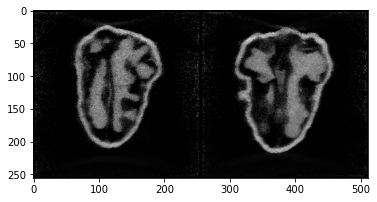

In [201]:
#print(output.shape)
index = random.randint(0, 7)
plt.imshow(np.concatenate([output[index, 0], y[index, 0]], axis=-1), cmap='gray')

/media/pranjal/newdrive1/WalnutDataRecon/1_0.0135_50_huber.npy
/media/pranjal/newdrive1/WalnutDataRecon/1_0.0076_50_huber.npy
/media/pranjal/newdrive1/WalnutDataRecon/1_0_50_huber.npy
/media/pranjal/newdrive1/WalnutDataRecon/1_0.0425_50_huber.npy
/media/pranjal/newdrive1/WalnutDataRecon/1_0.0253_50_huber.npy
/media/pranjal/newdrive1/WalnutDataRecon/1_0.0384_50_huber.npy


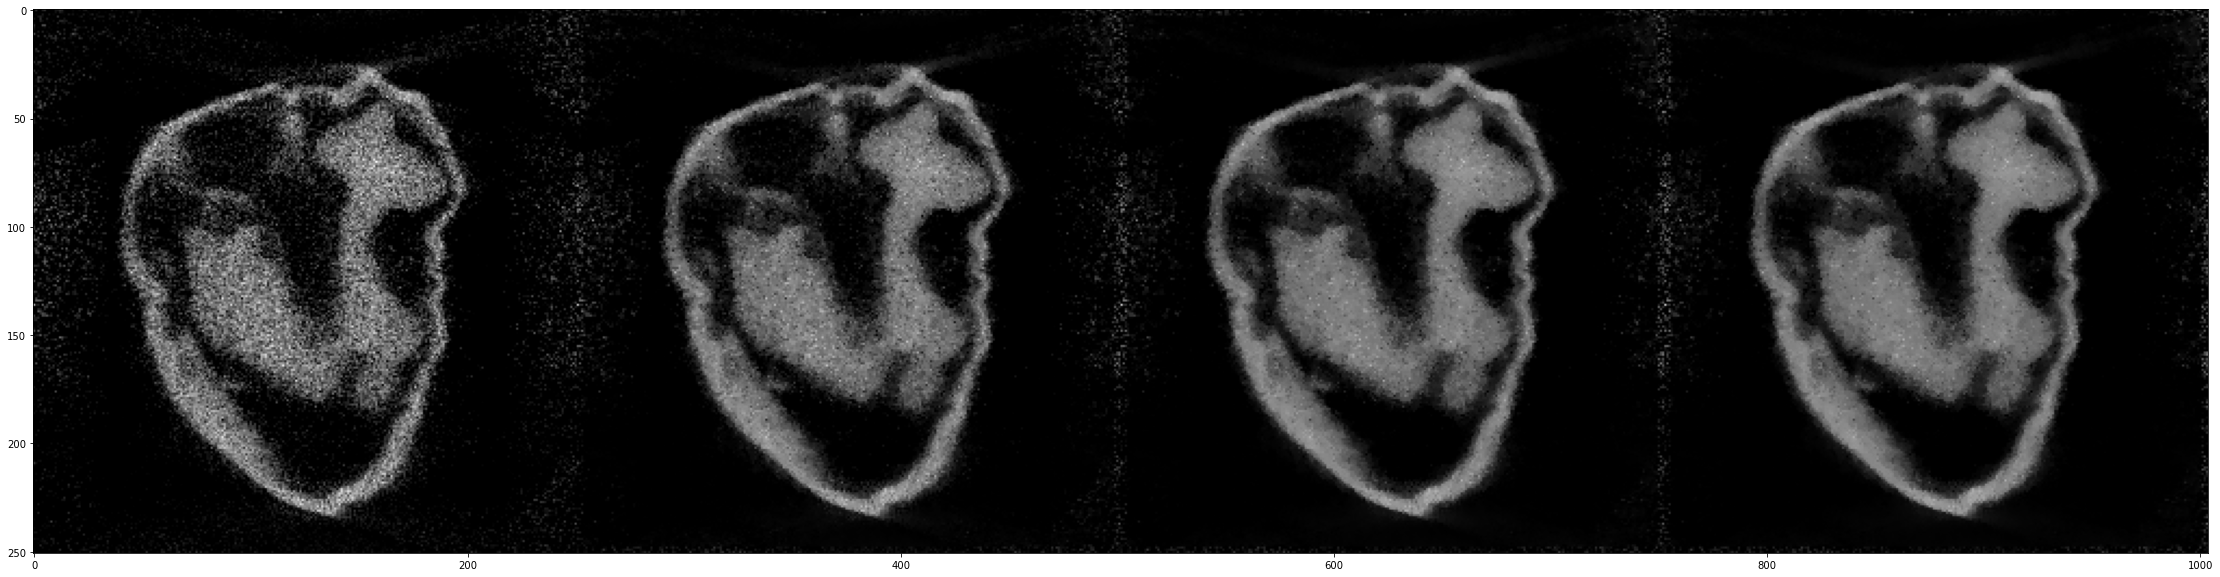

In [15]:
import numpy as np
import glob
import matplotlib.pyplot as plt

if 1:
    allfiles = glob.glob('/media/pranjal/newdrive1/WalnutDataRecon/1_*_50_huber.npy')
    for p in allfiles:
        print(p)

    a = np.load(allfiles[2])
    b = np.load(allfiles[1])
    c = np.load(allfiles[0])
    d = np.load(allfiles[4])
    e = np.load(allfiles[5])
    f = np.load(allfiles[3])

slice_index  = 140
plt.figure(figsize=(40,10))
plt.imshow(np.concatenate([a[:, slice_index, :],  d[:, slice_index, :], e[:, slice_index, :], f[:, slice_index, :]], axis=-1).astype('float32'), cmap='gray')
#plt.imshow(np.concatenate([a[:, slice_index, :],  d[:, slice_index, :],  f[:, slice_index, :]], axis=-1).astype('float32'), cmap='gray')

In [65]:
# Reconstruction Code for a given Walnut Case

# select the ID of the sample you want to reconstruct
walnut_id = 1
# select also the orbit you want to reconstruct the data from:
# 1 higher source position, 2 middle source position, 3 lower source position
orbit_id = 2
# define a sub-sampling factor in angular direction
# (all reference reconstructions are computed with full angular resolution)
angluar_sub_sampling = 10
# select of voxels per mm in one direction (higher = larger res)
# (all reference reconstructions are computed with 10)
voxel_per_mm = 5

# we enter here some intrinsic details of the dataset needed for our reconstruction scripts
# set the variable "data_path" to the path where the dataset is stored on your own workstation
data_path = '/media/pranjal/newdrive1/Walnuts/'
# set the variable "recon_path" to the path where you would like to store the
# reconstructions you compute
recon_path = '/media/pranjal/newdrive1/Walnut_recons/'

t = time.time();
print('load data', flush=True)

# we add the info about walnut and orbit ID
data_path_full = os.path.join(data_path, 'Walnut{}'.format(walnut_id), 'Projections', 'tubeV{}'.format(orbit_id))
projs_name = 'scan_{:06}.tif'
dark_name = 'di000000.tif'
flat_name = ['io000000.tif', 'io000001.tif']
vecs_name = 'scan_geom_corrected.geom'
projs_rows = 972
projs_cols = 768

# load the numpy array describing the scan geometry from file
vecs = np.loadtxt(os.path.join(data_path_full, vecs_name))
# get the positions we need; there are in fact 1201, but the last and first one come from the same angle
vecs       = vecs[range(0,1200, angluar_sub_sampling)]
# projection file indices, we need to read in the projection in reverse order due to the portrait mode acquision 
projs_idx  = range(1199,-1, -angluar_sub_sampling)

n_pro = vecs.shape[0]

# create the numpy array which will receive projection data from tiff files
projs = np.zeros((n_pro, projs_rows, projs_cols), dtype=np.float32)

# transformation to apply to each image, we need to get the image from
# the way the scanner reads it out into to way described in the projection
# geometry
trafo = lambda image : np.transpose(np.flipud(image))

# load flat-field and dark-fields
# there are two flat-field images (taken before and after acquisition), we simply average them
dark = trafo(imageio.imread(os.path.join(data_path_full, dark_name)))
flat = np.zeros((2, projs_rows, projs_cols), dtype=np.float32)

for i, fn in enumerate(flat_name):
    flat[i] = trafo(imageio.imread(os.path.join(data_path_full, fn)))
flat =  np.mean(flat,axis=0)

# load projection data
for i in range(n_pro):
    projs[i] = trafo(imageio.imread(os.path.join(data_path_full, projs_name.format(projs_idx[i]))))

print(np.round_(time.time() - t, 3), 'sec elapsed')

### pre-process data ###########################################################

t = time.time();
print('pre-process data', flush=True)
# subtract the dark field, divide by the flat field, and take the negative log to linearize the data according to the Beer-Lambert law
projs -= dark
projs /= (flat - dark)
np.log(projs, out=projs)
np.negative(projs, out=projs)
# permute data to ASTRA convention
projs = np.transpose(projs, (1,0,2))
projs = np.ascontiguousarray(projs)
print(np.round_(time.time() - t, 3), 'sec elapsed')

# [STAR] Testing GroundTruthReconstruction.py
import NesterovGradient

orbits_to_recon = [1,2,3]

#### load and pre-process data #################################################

t = time.time();
print('load and pre-process data', flush=True)

# we add the info about walnut
data_path_full = os.path.join(data_path, 'Walnut{}'.format(walnut_id), 'Projections')

projs_name = 'scan_{:06}.tif'
dark_name  = 'di000000.tif'
flat_name  = ['io000000.tif', 'io000001.tif']
vecs_name  = 'scan_geom_corrected.geom'
projs_rows = 972
projs_cols = 768

# Create the numpy array which will receive projection data from tiff files
projs = np.zeros((projs_rows, 0, projs_cols), dtype=np.float32)

# And create the numpy array receiving the motor positions read from the geometry file
vecs           = np.zeros((0, 12), dtype=np.float32)
nb_projs_orbit = len(range(0,1200, angluar_sub_sampling))
# projection file indices, we need to read in the projection in reverse order due to the portrait mode acquision 
projs_idx      = range(1199,-1, -angluar_sub_sampling)

# transformation to apply to each image, we need to get the image from
# the way the scanner reads it out into to way described in the projection
# geometry
trafo = lambda image : np.transpose(np.flipud(image))

# Loop over the subset of orbits we want to load at the same time
for orbit_id in tqdm(orbits_to_recon):
    orbit_data_path = os.path.join(data_path_full, 'tubeV{}'.format(orbit_id))


    # load the numpy array describing the scan geometry of the orbit from file
    vecs_orbit = np.loadtxt(os.path.join(orbit_data_path, vecs_name))
    
    # get the positions we need; there are in fact 1201, but the last and first one come from the same angle
    vecs = np.concatenate((vecs, vecs_orbit[range(0,1200, angluar_sub_sampling)]), axis=0)

    # load flat-field and dark-fields
    # there are two flat-field images (taken before and after acquisition), we simply average them
    dark = trafo(imageio.imread(os.path.join(orbit_data_path, dark_name)))
    flat = np.zeros((2, projs_rows, projs_cols), dtype=np.float32)
    for i, fn in enumerate(flat_name):
        flat[i] = trafo(imageio.imread(os.path.join(orbit_data_path, fn)))
    flat =  np.mean(flat,axis=0)

    # load projection data directly on the big projection array
    projs_orbit = np.zeros((nb_projs_orbit, projs_rows, projs_cols), dtype=np.float32)
    for i in range(nb_projs_orbit):
        projs_orbit[i] = trafo(imageio.imread(os.path.join(orbit_data_path, projs_name.format(projs_idx[i]))))

    # subtract the dark field, devide by the flat field, and take the negative log to linearize the data according to the Beer-Lambert law
    projs_orbit -= dark
    projs_orbit /= (flat - dark)
    
    noise       = random_noise(projs_orbit, mode="poisson")
    projs_orbit = projs_orbit + noise
    
    # take negative log
    np.log(projs_orbit, out=projs_orbit)
    np.negative(projs_orbit, out=projs_orbit)
    # permute data to ASTRA convention
    projs_orbit = np.transpose(projs_orbit, (1,0,2))

    # attach to projs
    projs = np.concatenate((projs, projs_orbit), axis=1)
    del projs_orbit

# from skimage.util import random_noise

#for k in range(360):
#    p     = projs[:, k, :]
#    #noise = random_noise(p, mode="poisson")
#    #noise = np.random.poisson(p)
#    #noise = np.random.normal(0, 0.1, p.shape)
#    #p     = p + noise
#    projs[:, k, :] = p
projs = np.ascontiguousarray(projs)

load data
0.229 sec elapsed
pre-process data
2.736 sec elapsed
load and pre-process data


100%|██████████| 3/3 [00:43<00:00, 14.52s/it]


In [51]:
W = astra.OpTomo(cfg_agd['ProjectorId'])
print(W)
print(W.FP)

<268738560x15813251 OpTomo with dtype=<class 'numpy.float32'>>
<bound method OpTomo.FP of <268738560x15813251 OpTomo with dtype=<class 'numpy.float32'>>>


In [24]:
### compute FDK reconstruction #################################################

t = time.time();
print('compute reconstruction', flush=True)

# size of the reconstruction volume in voxels
vol_sz  = 3*(50 * voxel_per_mm + 1,)
# size of a cubic voxel in mm
vox_sz  = 1/voxel_per_mm
# numpy array holding the reconstruction volume
vol_rec = np.zeros(vol_sz, dtype=np.float32)

# we need to specify the details of the reconstruction space to ASTRA
# this is done by a "volume geometry" type of structure, in the form of a Python dictionary
# by default, ASTRA assumes a voxel size of 1, we need to scale the reconstruction space here by the actual voxel size
vol_geom = astra.create_vol_geom(vol_sz)
vol_geom['option']['WindowMinX'] = vol_geom['option']['WindowMinX'] * vox_sz
vol_geom['option']['WindowMaxX'] = vol_geom['option']['WindowMaxX'] * vox_sz
vol_geom['option']['WindowMinY'] = vol_geom['option']['WindowMinY'] * vox_sz
vol_geom['option']['WindowMaxY'] = vol_geom['option']['WindowMaxY'] * vox_sz
vol_geom['option']['WindowMinZ'] = vol_geom['option']['WindowMinZ'] * vox_sz
vol_geom['option']['WindowMaxZ'] = vol_geom['option']['WindowMaxZ'] * vox_sz

# we need to specify the details of the projection space to ASTRA
# this is done by a "projection geometry" type of structure, in the form of a Python dictionary
proj_geom = astra.create_proj_geom('cone_vec', projs_rows, projs_cols, vecs)

# register both volume and projection geometries and arrays to ASTRA
#vol_id  = astra.data3d.link('-vol', vol_geom, vol_rec)
#proj_id = astra.data3d.link('-sino', proj_geom, projs)

vol_id  = astra.data3d.create('-vol', vol_geom)
proj_id = astra.data3d.create('-sino', proj_geom, projs)


#astra.create_projector('cuda3d', proj_geom, projs)

# finally, create an ASTRA configuration.
# this configuration dictionary setups an algorithm, a projection and a volume
# geometry and returns a ASTRA algorithm, which can be run on its own
# cfg_fdk = astra.astra_dict('FDK_CUDA')
# cfg_fdk['ProjectionDataId'] = proj_id
# cfg_fdk['ReconstructionDataId'] = vol_id
# cfg_fdk['option'] = {}
# cfg_fdk['option']['ShortScan'] = False
# alg_id = astra.algorithm.create(cfg_fdk)

compute reconstruction


In [ ]:
# finally, create an ASTRA configuration.
# this configuration dictionary setups an algorithm, a projection and a volume
# geometry and returns a ASTRA algorithm, which can be run on its own
cfg_fdk = astra.astra_dict('FDK_CUDA')
cfg_fdk['ProjectionDataId']     = proj_id
cfg_fdk['ReconstructionDataId'] = vol_id
cfg_fdk['option'] = {}
cfg_fdk['option']['ShortScan'] = False
alg_id = astra.algorithm.create(cfg_fdk)

# run FDK algorithm
astra.algorithm.run(alg_id, 1)

# release memory allocated by ASTRA structures
astra.algorithm.delete(alg_id)
astra.data3d.delete(proj_id)
astra.data3d.delete(vol_id)

print(np.round_(time.time() - t, 3), 'sec elapsed')

In [5]:
proj_geom        = astra.create_proj_geom('cone_vec', projs_rows, projs_cols, vecs)
proj_id          = astra.create_projector('cuda3d',   proj_geom, vol_geom)
W                = astra.OpTomo(proj_id)

In [16]:
print(proj_id)
W = astra.OpTomo(proj_id)

#W                = astra.OpTomo(proj_id)

7


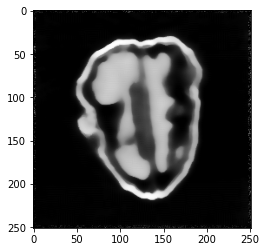

In [159]:
# 0.1
plt.imshow(vol_rec[:, 160, :], cmap='gray')

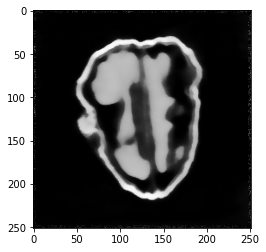

In [153]:
# 0.05
plt.imshow(vol_rec[:, 160, :], cmap='gray')

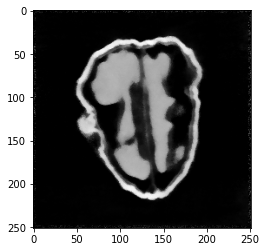

In [155]:
# 0.02
plt.imshow(vol_rec[:, 160, :], cmap='gray')

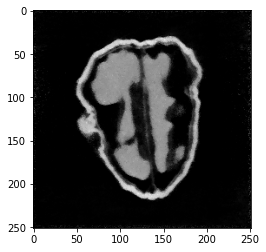

In [151]:
# 0.01
plt.imshow(vol_rec[:, 160, :], cmap='gray')

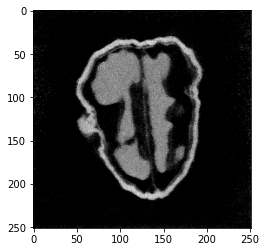

In [157]:
# 0.005
plt.imshow(vol_rec[:, 160, :], cmap='gray')

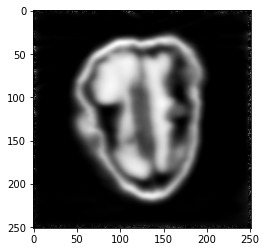

In [162]:
plt.imshow(vol_rec[:, 160, :], cmap='gray')

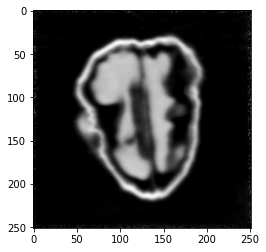

In [164]:
plt.imshow(vol_rec[:, 160, :], cmap='gray')

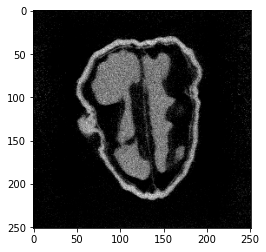

In [145]:
plt.imshow(vol_rec[:, 160, :], cmap='gray')

In [163]:
# Reconstruction Algorithm Code Step by Step

from numba import jit
from numba import njit, prange

@jit(nopython=True, parallel=True)
def my_divide(x, y):
    return np.divide(x, y)

@jit(nopython=True, parallel=True)
def my_add(x, y):
    return np.add(x, y)

@jit(nopython=True, parallel=True)
def my_mul(x, y):
    return np.multiply(x, y)

@njit(parallel=True)
def G_Huber_prior_sart(estbuf, delta):
    priorbuf = np.zeros(estbuf.shape)
    cent     = 1
    
    for ind_x in prange(3, estbuf.shape[0]-3):
        for ind_y in prange(3, estbuf.shape[1]-3):
            for ind_z in prange(3, estbuf.shape[2]-3):
                # For All the Voxels
                
                for ind_nr_z  in range(ind_z-1, ind_z+2):
                    for ind_nr_y in range(ind_y-1, ind_y+2):
                        for ind_nr_x in range(ind_x-1, ind_x+2):
                            distance = np.sqrt(float((ind_nr_x-ind_x)*(ind_nr_x-ind_x)+(ind_nr_y-ind_y)*(ind_nr_y-ind_y)+(ind_nr_z-ind_z)*(ind_nr_z-ind_z)))
                            
                            if (distance == 0.0):
                                distance = 1.0
                            
                            #if ( ind_nr_x<0  or ind_nr_y<0 or ind_nr_z<0 or ind_nr_x>(IMGSIZx-1) or ind_nr_y>(IMGSIZy-1) or ind_nr_z>(IMGSIZz-1) ):
                            #    ind_nr = int(ind_voxel)
                            #else:
                            #    ind_nr = int(ind_nr_x + ind_nr_y*IMGSIZx + ind_nr_z*IMGSIZx*IMGSIZy)
                            
                            diff        = estbuf[ind_x][ind_y][ind_z] - estbuf[ind_nr_x][ind_nr_y][ind_nr_z]
                            denominator = np.sqrt(1.0+(diff/delta)*(diff/delta))
                            priorbuf[ind_x][ind_y][ind_z] = priorbuf[ind_x][ind_y][ind_z] + diff
                            #priorbuf[ind_x][ind_y][ind_z] = priorbuf[ind_x][ind_y][ind_z] + (1.0/distance)*diff/denominator
    return priorbuf

proj_id      = astra.data3d.link('-sino', proj_geom, projs)
proj_arr     = astra.data3d.get_shared(proj_id)#.flatten()

proj_geom        = astra.create_proj_geom('cone_vec', projs_rows, projs_cols, vecs)
proj_id          = astra.create_projector('cuda3d',   proj_geom, vol_geom)
W                = astra.OpTomo(proj_id)

vol_rec      = np.zeros(vol_sz, dtype=np.float32)
only_ones_v  = np.ones(vol_rec.shape, dtype='float32')
only_ones_p  = np.ones(proj_arr.shape, dtype='float32')

delta = 0.001
niter = 100
beta  = 0.01

for j in range(0, niter):
    print("Iteration ", j)
    
    prior     = G_Huber_prior_sart(vol_rec, delta)
    
    p         = W.FP(vol_rec)
    diff      = proj_arr - p
    
    cost = np.square(diff)
    print("Cost is ", np.sum(cost), prior.shape, vol_rec.shape)
    
    temp_R    = W.FP(only_ones_v)
    diff      = my_divide(diff, temp_R)
    
    temp_back = W.BP(diff)
    temp_C    = W.BP(only_ones_p)
    vol       = my_divide(temp_back, temp_C)
    vol       = np.nan_to_num(vol)
    
    #vol[vol == np.nan] = 0
    
    vol      = np.reshape(vol, vol_rec.shape)
    vol_rec  = vol_rec + vol- beta*prior
    vol_rec[vol_rec < 0] = 0
    #print(temp_R.shape, temp_back.shape, temp_C.shape, p.shape, proj_arr.shape)
    #p = np.reshape(p, [detCols, 25, detRows])
    #print(p.shape, temp_back.shape)

#vol[vol == np.nan] = 0

Iteration  0
Cost is  43434828.0 (251, 251, 251) (251, 251, 251)
Iteration  1
Cost is  9987929.0 (251, 251, 251) (251, 251, 251)
Iteration  2
Cost is  7673575.5 (251, 251, 251) (251, 251, 251)
Iteration  3
Cost is  6347395.0 (251, 251, 251) (251, 251, 251)
Iteration  4
Cost is  5492666.5 (251, 251, 251) (251, 251, 251)
Iteration  5
Cost is  4915728.0 (251, 251, 251) (251, 251, 251)
Iteration  6
Cost is  4512524.5 (251, 251, 251) (251, 251, 251)
Iteration  7
Cost is  4218172.0 (251, 251, 251) (251, 251, 251)
Iteration  8
Cost is  3993442.5 (251, 251, 251) (251, 251, 251)
Iteration  9
Cost is  3815202.5 (251, 251, 251) (251, 251, 251)
Iteration  10
Cost is  3669376.2 (251, 251, 251) (251, 251, 251)
Iteration  11
Cost is  3547098.0 (251, 251, 251) (251, 251, 251)
Iteration  12
Cost is  3442587.2 (251, 251, 251) (251, 251, 251)
Iteration  13
Cost is  3351984.8 (251, 251, 251) (251, 251, 251)
Iteration  14
Cost is  3272555.0 (251, 251, 251) (251, 251, 251)
Iteration  15
Cost is  3202272.5 (

In [ ]:
# run FDK algorithm
astra.algorithm.run(alg_id, 1)

# release memory allocated by ASTRA structures
astra.algorithm.delete(alg_id)
astra.data3d.delete(proj_id)
astra.data3d.delete(vol_id)

print(np.round_(time.time() - t, 3), 'sec elapsed')



### save reconstruction ########################################################

t = time.time();
print('save results', flush=True)

# low level plotting
f, ax = plt.subplots(1, 3, sharex=False, sharey=False)
ax[0].imshow(vol_rec[vol_sz[0]//2,:,:])
ax[1].imshow(vol_rec[:,vol_sz[1]//2,:])
ax[2].imshow(vol_rec[:,:,vol_sz[2]//2])
f.tight_layout()

# construct full path for storing the results
recon_path_full = os.path.join(recon_path, 'Walnut{}'.format(walnut_id))

# create the directory in case it doesn't exist yet
if not os.path.exists(recon_path_full):
    os.makedirs(recon_path_full)

# Save every slice in  the volume as a separate tiff file
for i in range(vol_sz[0]):
    slice_path = os.path.join(recon_path_full, 'fdk_pos{}_ass{}_vmm{}_{:06}.tiff'.format(orbit_id,
                                  angluar_sub_sampling, voxel_per_mm, i))
    imageio.imwrite(slice_path, vol_rec[i,...])

print(np.round_(time.time() - t, 3), 'sec elapsed')


load and pre-process data


/home/pranjal/anaconda3/envs/tensorflow/lib/python3.6/site-packages/imageio/plugins/_tifffile.py:2945: UserWarning: invalid tag value offset
  warnings.warn(str(e))


54.49 sec elapsed
compute reconstruction:
running power iteration to determine step size
plugin initialized.
running 50 iterations of Accelerated Gradient plugin.
iteration 0 / 50
iteration 10 / 50
iteration 20 / 50
iteration 30 / 50
iteration 40 / 50
119.815 sec elapsed
save results
0.813 sec elapsed


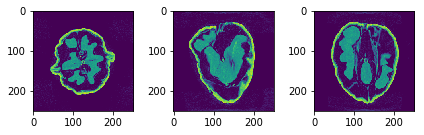

In [ ]:
for k in range(360):
    p     = projs[:, k, :]
    #noise = random_noise(p, mode="poisson")
    #noise = np.random.poisson(p)
    #noise = np.random.normal(0, 0.1, p.shape)
    p     = p + noise
    projs[:, k, :] = p
projs = np.ascontiguousarray(projs)

In [47]:
import SimpleITK as sitk

a1 = sitk.GetImageFromArray(vol_rec)
sitk.WriteImage(a1, 'test2.nii.gz')

In [40]:
#print(vol_rec.shape)

(251, 251, 251)


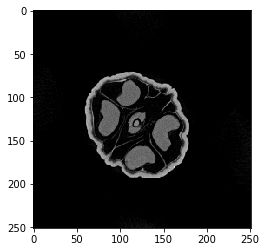

In [38]:
plt.imshow(vol_rec[170], cmap='gray')

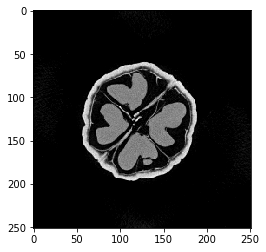

In [37]:
plt.imshow(vol_rec[70], cmap='gray')

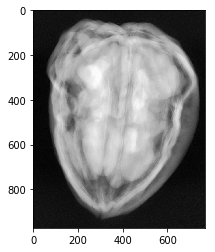

In [17]:
#print(projs.shape)
#t1 = copy.deepcopy(projs[:, 180, :])

plt.imshow(projs[:, 180, :], cmap='gray')